#### load in modules

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import math as m

#### utility functions

In [4]:
# exponentially increasing/decreasing importation rate
def exponential_importation(t, M0, rate):
    return round(M0 * m.exp(rate * t))

# update lineage size assuming local exponential growth
def get_lineage_size(import_time, t, r):
    return round(m.exp(r * (t - import_time)))

#### simulate lineage growth under CONSTANT importation rate

In [5]:
# specify local growth rate
r = 0.25

# constant importation rate
importation_M0 = 100
importation_m = 0

# simulate up to T=20
observe_T20_lineages_tracker = []
for time in tqdm(range(20+1)):
    observe_T20_lineages_tracker += [(time, get_lineage_size(time, 20, r))] * exponential_importation(time, importation_M0, importation_m)
    
# simulate up to T=40
observe_T40_lineages_tracker = []
for time in tqdm(range(40+1)):
    observe_T40_lineages_tracker += [(time, get_lineage_size(time, 40, r))] * exponential_importation(time, importation_M0, importation_m)

100%|██████████| 41/41 [00:00<00:00, 267860.54it/s]


#### get lineage size distribution

In [7]:
# get lineage sizes (T=20)
observe_T20_lineage_sizes = [x[1] for x in observe_T20_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T20_lineage_sizes_binned = np.bincount(observe_T20_lineage_sizes)

In [8]:
# get lineage sizes (T=40)
observe_T40_lineage_sizes = [x[1] for x in observe_T40_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T40_lineage_sizes_binned = np.bincount(observe_T40_lineage_sizes)

#### plot cumulative lineage size distribution vs analytical solution

/var/folders/q9/0h40wkyj4s79vh8zt8z0yssm0000gp/T/ipykernel_4974/3898691473.py:11: RuntimeWarning: divide by zero encountered in log
  y_func = lambda x: np.log(len(observe_T20_lineage_sizes_binned)) - np.log(x)
/var/folders/q9/0h40wkyj4s79vh8zt8z0yssm0000gp/T/ipykernel_4974/3898691473.py:24: RuntimeWarning: divide by zero encountered in log
  y_func = lambda x: np.log(len(observe_T40_lineage_sizes_binned)) - np.log(x)


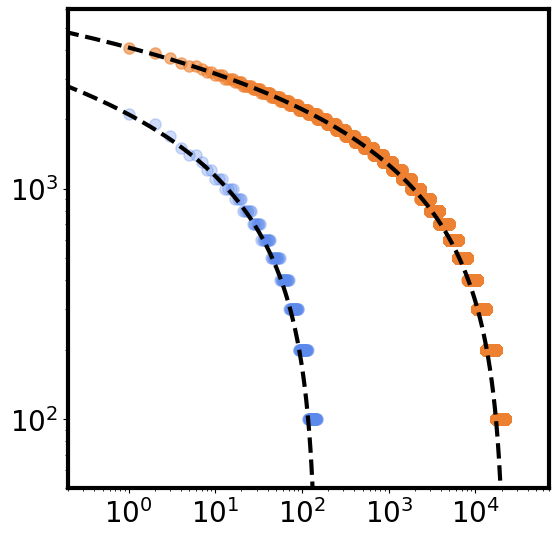

In [ ]:
fig, ax = plt.subplots(figsize=(6.2, 6.22))

### observation at T=20 ###
# get cumulative binned lineage sizes
observe_20_cumulative_lineage_sizes_binned = np.cumsum(observe_T20_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T20_lineage_sizes_binned)), observe_20_cumulative_lineage_sizes_binned[1:],
           s=65, color='#5C89EC', alpha=0.3, marker='o')

# plot analytical solution as black dashed line
y_func = lambda x: np.log(len(observe_T20_lineage_sizes_binned)) - np.log(x)
x = np.arange(0, (len(observe_T20_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_20_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

### observation at T=40 ###
# get cumulative binned lineage sizes
observe_40_cumulative_lineage_sizes_binned = np.cumsum(observe_T40_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T40_lineage_sizes_binned)), observe_40_cumulative_lineage_sizes_binned[1:],
           s=65, color='#EE8131', alpha=0.6, marker='o')

# plot analytical solution as black dashed line
y_func = lambda x: np.log(len(observe_T40_lineage_sizes_binned)) - np.log(x)
x = np.arange(0, (len(observe_T40_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_40_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

# adjust x-limit
plt.xlim(2e-1, 7e4)
plt.ylim(5e1, 6e3)

# adjust x-axis font size
plt.xticks(fontsize=20)
# adjust y-axis font size
plt.yticks(fontsize=20)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# log scale
ax.set_yscale('log')
ax.set_xscale('log')

# export
fig.savefig('./figures/constant_importation_cumulative_lineage_size_distr.pdf', bbox_inches='tight')

#### simulate lineage growth under exponentially INCREASING importation rate

In [17]:
# specify local growth rate
r = 0.25

# exponentially increasing importation rate
importation_M0 = 1
importation_m = 0.2

# simulate up to T=20
observe_T20_lineages_tracker = []
for time in tqdm(range(20+1)):
    observe_T20_lineages_tracker += [(time, get_lineage_size(time, 20, r))] * exponential_importation(time, importation_M0, importation_m)
    
# simulate up to T=40
observe_T40_lineages_tracker = []
for time in tqdm(range(40+1)):
    observe_T40_lineages_tracker += [(time, get_lineage_size(time, 40, r))] * exponential_importation(time, importation_M0, importation_m)

100%|██████████| 41/41 [00:00<00:00, 213622.94it/s]


#### get lineage size distribution

In [18]:
# get lineage sizes (T=20)
observe_T20_lineage_sizes = [x[1] for x in observe_T20_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T20_lineage_sizes_binned = np.bincount(observe_T20_lineage_sizes)

In [19]:
# get lineage sizes (T=40)
observe_T40_lineage_sizes = [x[1] for x in observe_T40_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T40_lineage_sizes_binned = np.bincount(observe_T40_lineage_sizes)

#### plot cumulative lineage size distribution vs analytical solution

/var/folders/q9/0h40wkyj4s79vh8zt8z0yssm0000gp/T/ipykernel_4974/245351551.py:12: RuntimeWarning: divide by zero encountered in power
  y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T20_lineage_sizes_binned), predicted_exponent)
/var/folders/q9/0h40wkyj4s79vh8zt8z0yssm0000gp/T/ipykernel_4974/245351551.py:25: RuntimeWarning: divide by zero encountered in power
  y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T40_lineage_sizes_binned), predicted_exponent)


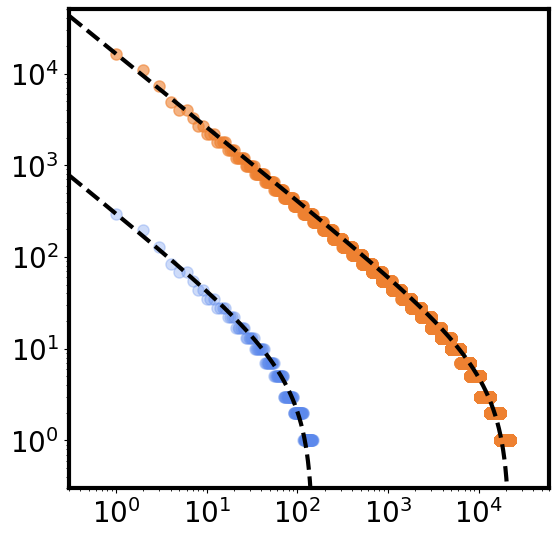

In [20]:
fig, ax = plt.subplots(figsize=(6.2, 6.22))

### observation at T=20 ###
# get cumulative binned lineage sizes
observe_20_cumulative_lineage_sizes_binned = np.cumsum(observe_T20_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T20_lineage_sizes_binned)), observe_20_cumulative_lineage_sizes_binned[1:],
           s=65, color='#5C89EC', alpha=0.3, marker='o')

# plot analytical solution as black dashed line
predicted_exponent = -importation_m/r
y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T20_lineage_sizes_binned), predicted_exponent)
x = np.arange(0, (len(observe_T20_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_20_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

### observation at T=40 ###
# get cumulative binned lineage sizes
observe_40_cumulative_lineage_sizes_binned = np.cumsum(observe_T40_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T40_lineage_sizes_binned)), observe_40_cumulative_lineage_sizes_binned[1:],
           s=65, color='#EE8131', alpha=0.6, marker='o')

# plot analytical solution as black dashed line
y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T40_lineage_sizes_binned), predicted_exponent)
x = np.arange(0, (len(observe_T40_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_40_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

# adjust x-limit
plt.xlim(0.3e0, 6e4)
plt.ylim(3e-1, 0.5e5)

# adjust x-axis font size
plt.xticks(fontsize=20)
# adjust y-axis font size
plt.yticks(fontsize=20)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# log scale
ax.set_yscale('log')
ax.set_xscale('log')

# export
fig.savefig('./figures/exp_increasing_importation_cumulative_lineage_size_distr.pdf', bbox_inches='tight')

#### simulate lineage growth under exponentially DECREASING importation rate

In [21]:
# specify local growth rate
r = 0.25

# exponentially increasing importation rate
importation_M0 = 200
importation_m = -0.3

# simulate up to T=20
observe_T20_lineages_tracker = []
for time in tqdm(range(20+1)):
    observe_T20_lineages_tracker += [(time, get_lineage_size(time, 20, r))] * exponential_importation(time, importation_M0, importation_m)
    
# simulate up to T=40
observe_T40_lineages_tracker = []
for time in tqdm(range(40+1)):
    observe_T40_lineages_tracker += [(time, get_lineage_size(time, 40, r))] * exponential_importation(time, importation_M0, importation_m)

100%|██████████| 41/41 [00:00<00:00, 471141.00it/s]


#### get lineage size distribution

In [22]:
# get lineage sizes (T=20)
observe_T20_lineage_sizes = [x[1] for x in observe_T20_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T20_lineage_sizes_binned = np.bincount(observe_T20_lineage_sizes)

In [23]:
# get lineage sizes (T=40)
observe_T40_lineage_sizes = [x[1] for x in observe_T40_lineages_tracker]
# bin (from 1 to max lineage size) and count
observe_T40_lineage_sizes_binned = np.bincount(observe_T40_lineage_sizes)

#### plot cumulative lineage size distribution vs analytical solution

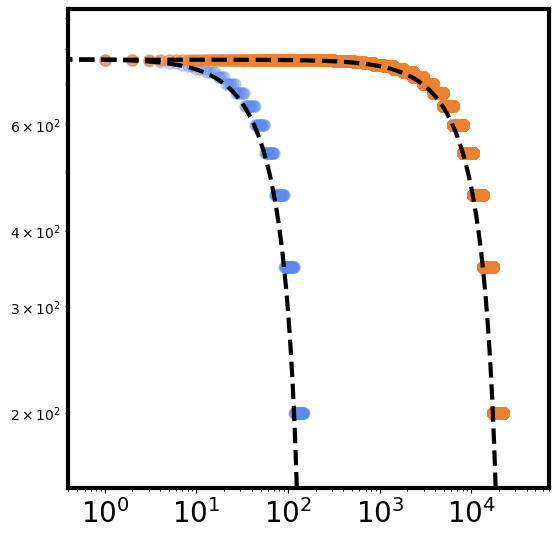

In [24]:
fig, ax = plt.subplots(figsize=(6.2, 6.22))

### observation at T=20 ###
# get cumulative binned lineage sizes
observe_20_cumulative_lineage_sizes_binned = np.cumsum(observe_T20_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T20_lineage_sizes_binned)), observe_20_cumulative_lineage_sizes_binned[1:],
           s=65, color='#5C89EC', alpha=0.3, marker='o')

# plot analytical solution as black dashed line
predicted_exponent = -importation_m/r
y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T20_lineage_sizes_binned), predicted_exponent)
x = np.arange(0, (len(observe_T20_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_20_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

### observation at T=40 ###
# get cumulative binned lineage sizes
observe_40_cumulative_lineage_sizes_binned = np.cumsum(observe_T40_lineage_sizes_binned[::-1])[::-1]
# plot cumulative lineage size distribution
ax.scatter(range(1, len(observe_T40_lineage_sizes_binned)), observe_40_cumulative_lineage_sizes_binned[1:],
           s=65, color='#EE8131', alpha=0.6, marker='o')

# plot analytical solution as black dashed line
y_func = lambda x: np.power(x, predicted_exponent) - np.power(len(observe_T40_lineage_sizes_binned), predicted_exponent)
x = np.arange(0, (len(observe_T40_lineage_sizes_binned)-1)*3, 0.1).astype(float)
y = y_func(x) * observe_40_cumulative_lineage_sizes_binned[0] / y_func(1)  # re-scale to match the y-intercept
ax.plot(x, y, linestyle='--', color='k', linewidth=3, zorder=100, alpha=1)

# adjust x-limit
plt.xlim(0.4e0, 7e4)
plt.ylim(1.5e2, 0.93e3)

# adjust x-axis font size
plt.xticks(fontsize=20)
# adjust y-axis font size
plt.yticks(fontsize=20)

# add plot border
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# log scale
ax.set_yscale('log')
ax.set_xscale('log')

# export
fig.savefig('./figures/exp_decreasing_importation_cumulative_lineage_size_distr.pdf', bbox_inches='tight')